In [6]:
%pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Numeric columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


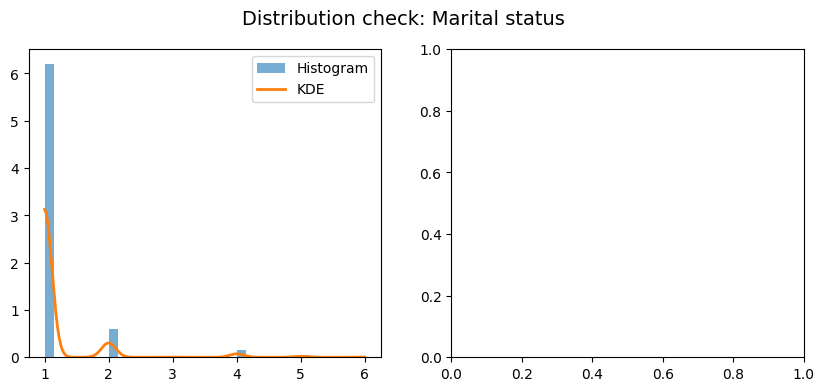

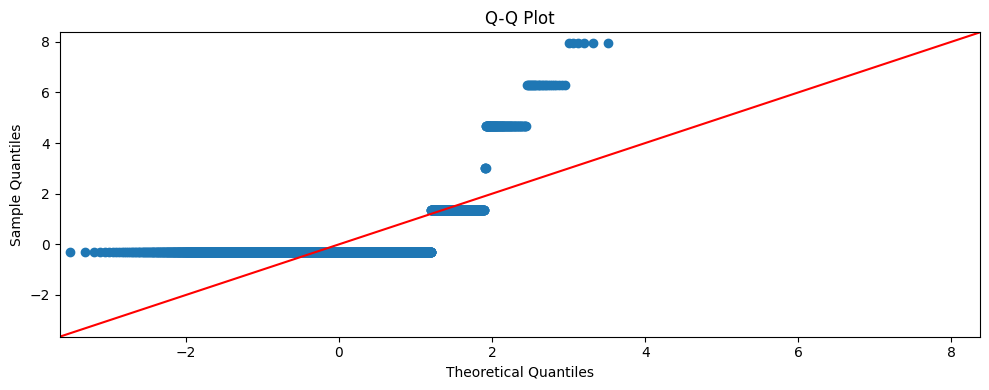

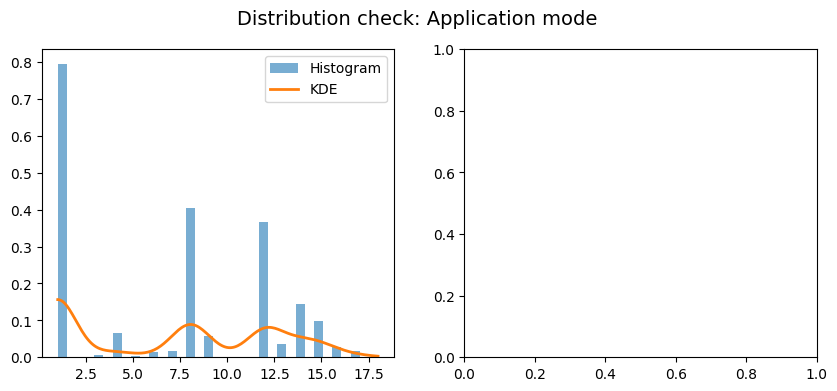

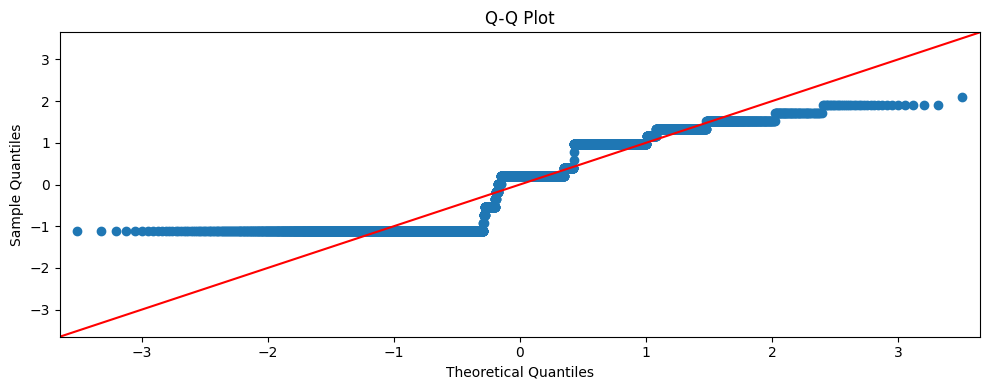

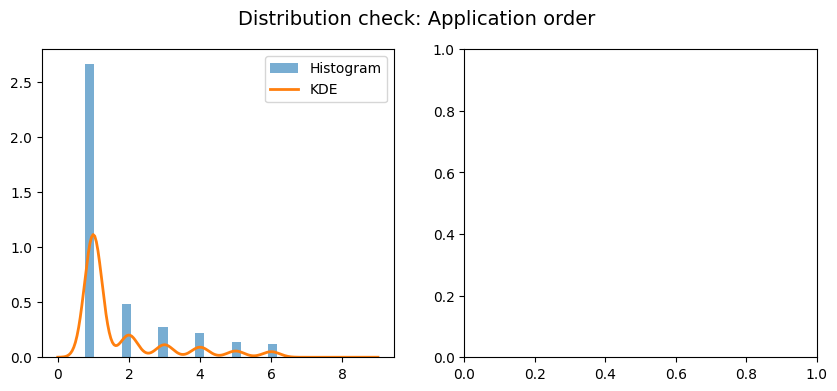

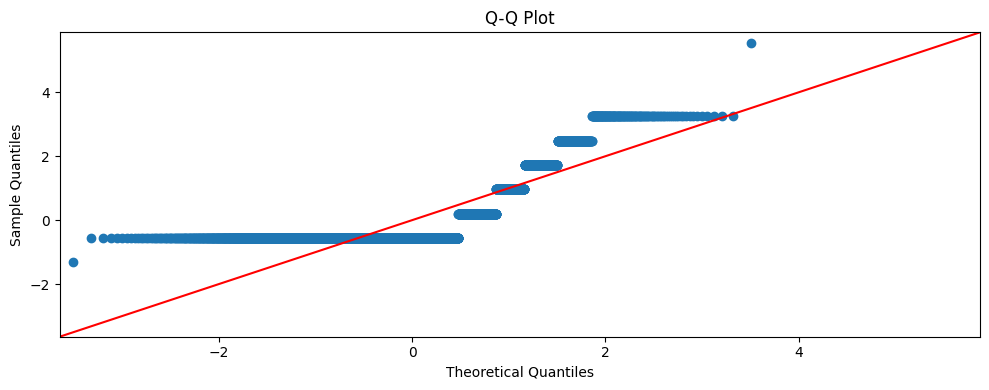

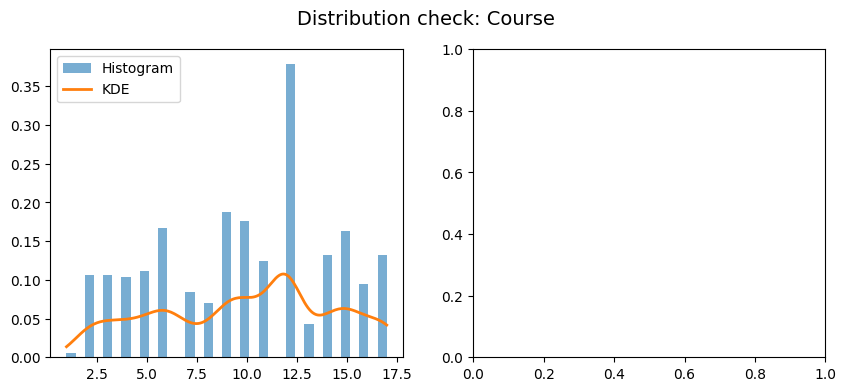

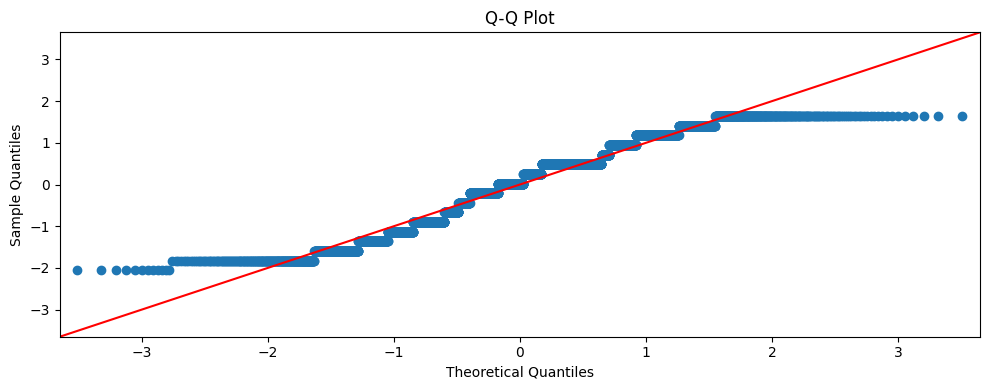

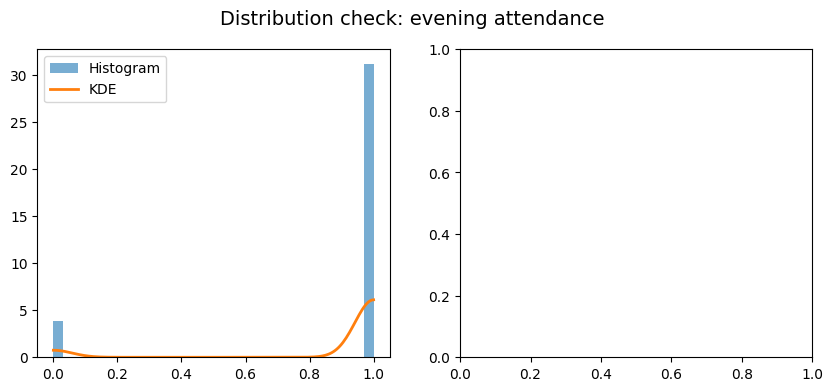

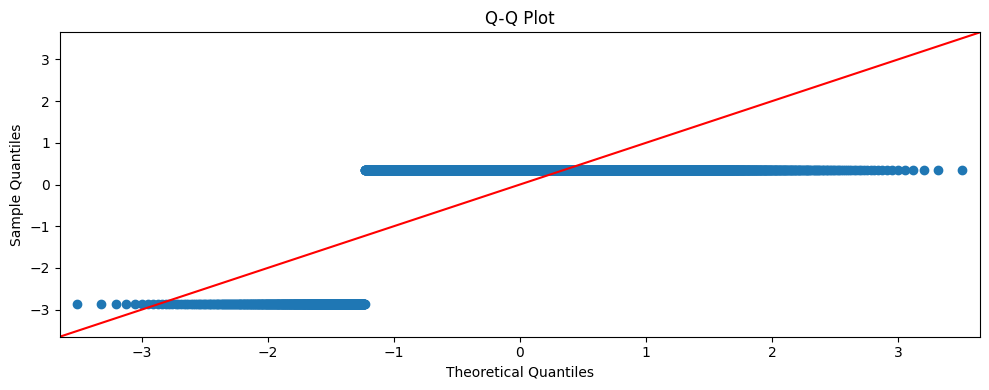

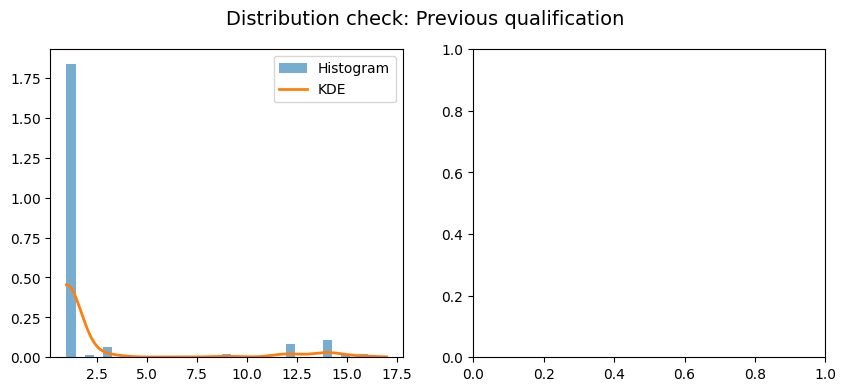

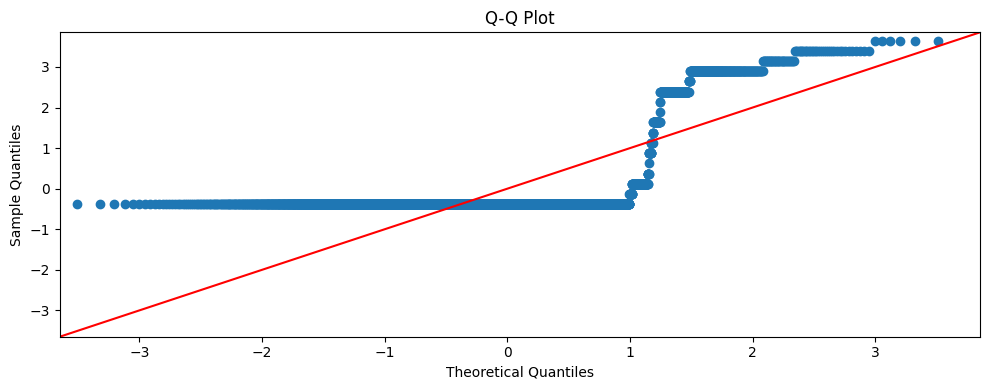

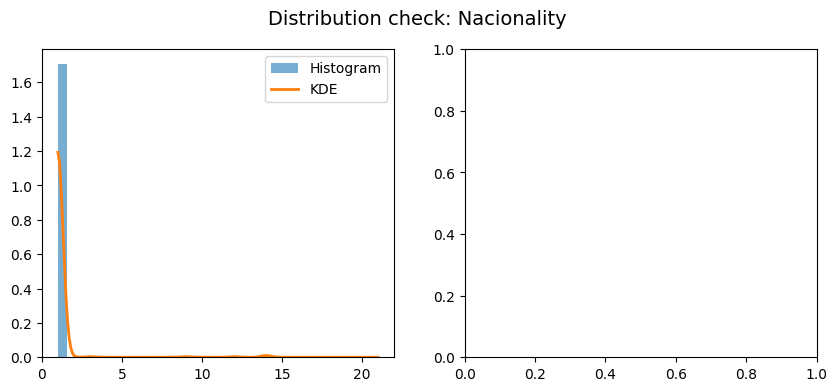

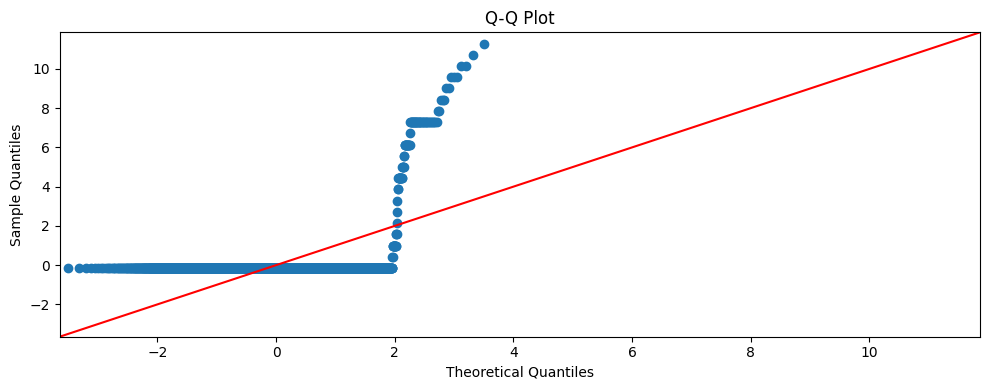

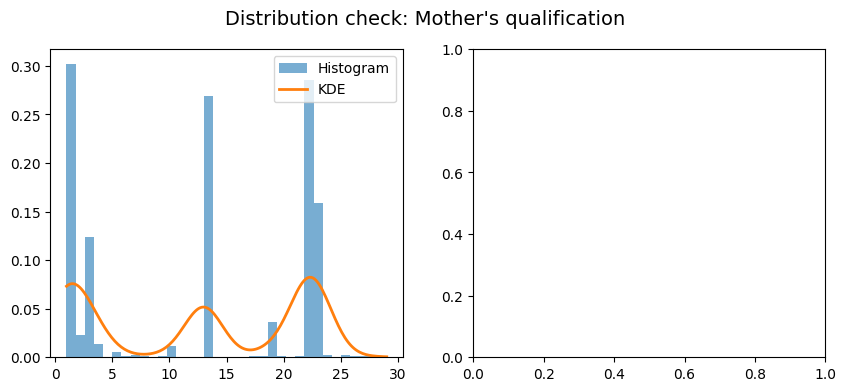

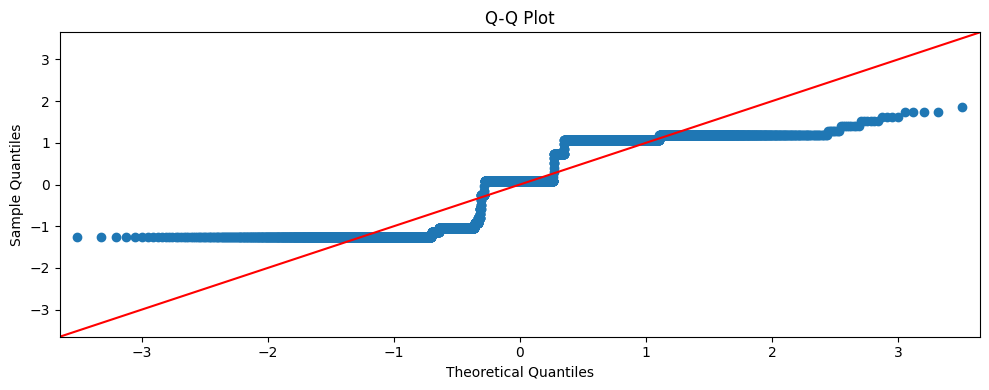

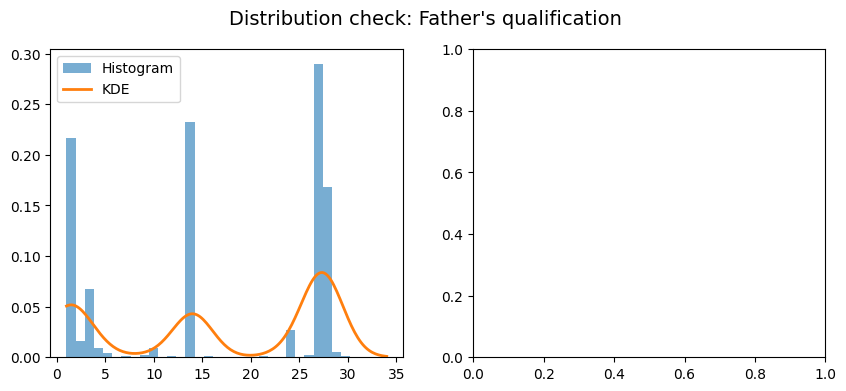

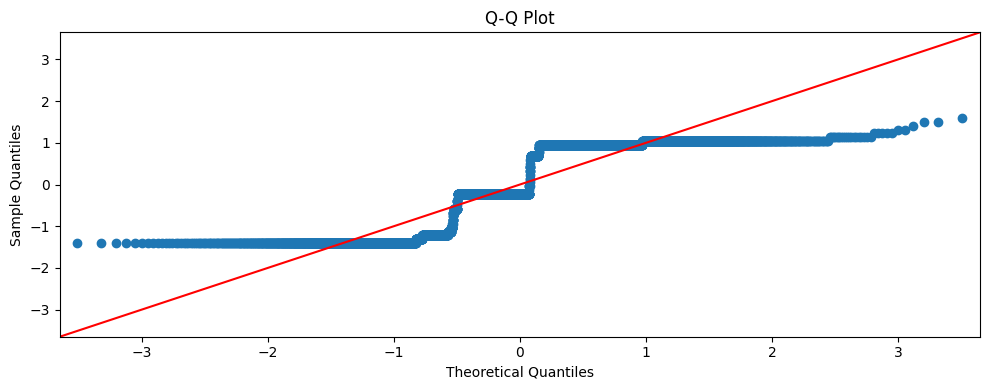

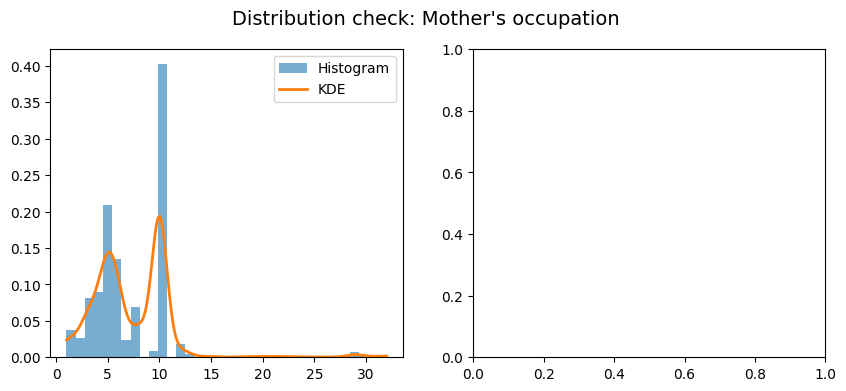

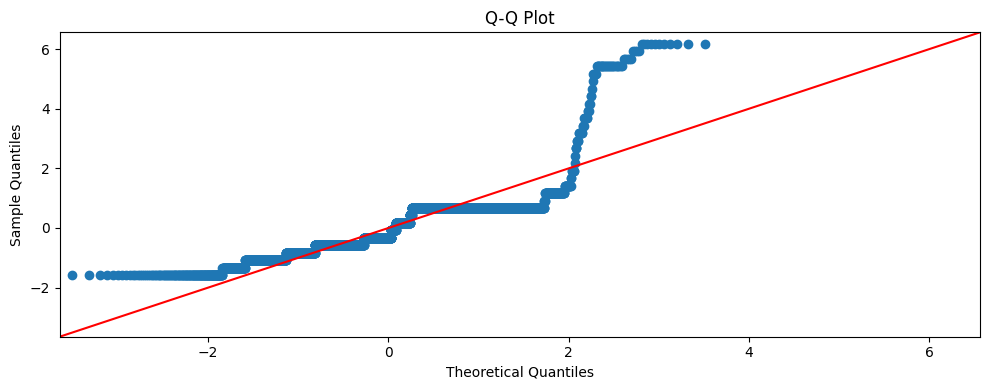

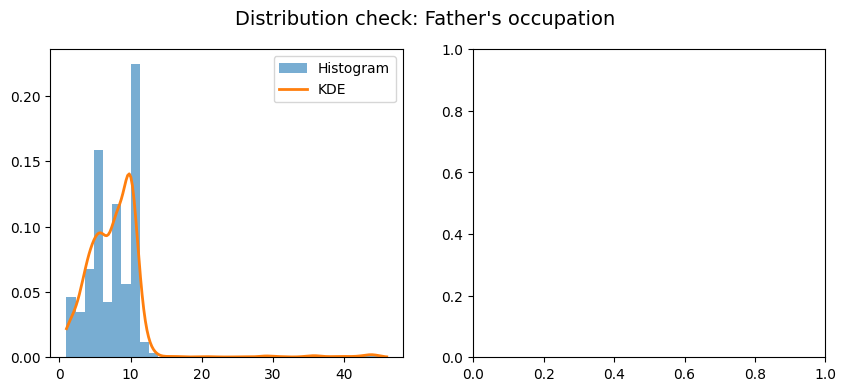

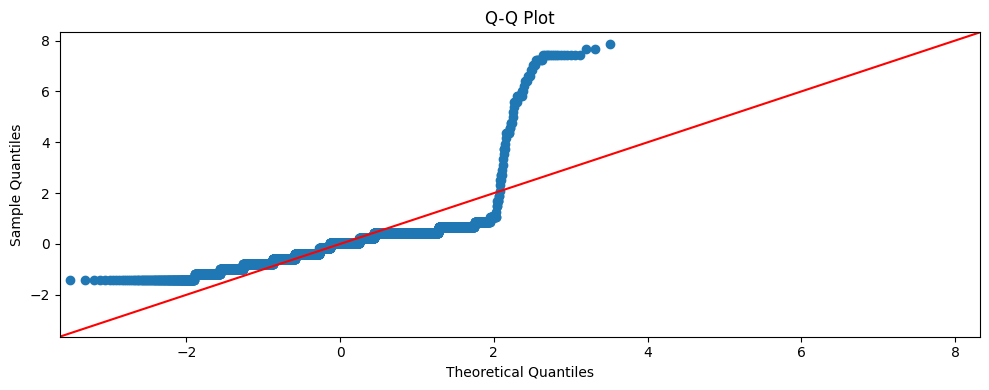

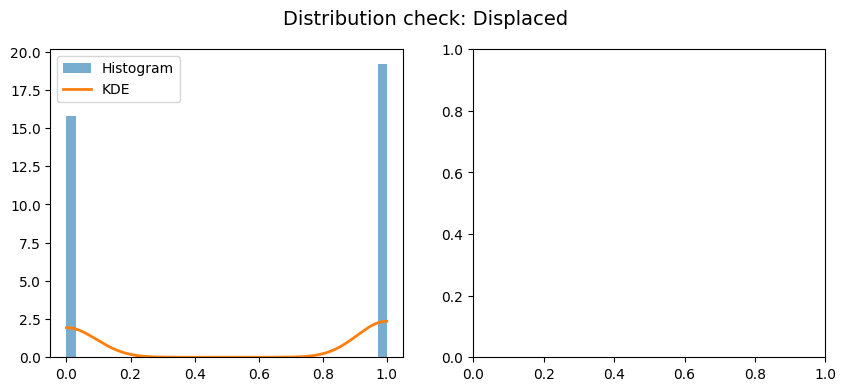

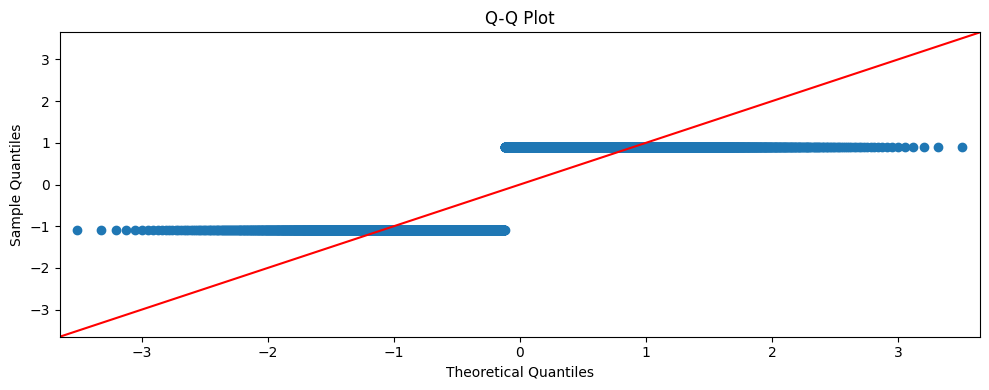

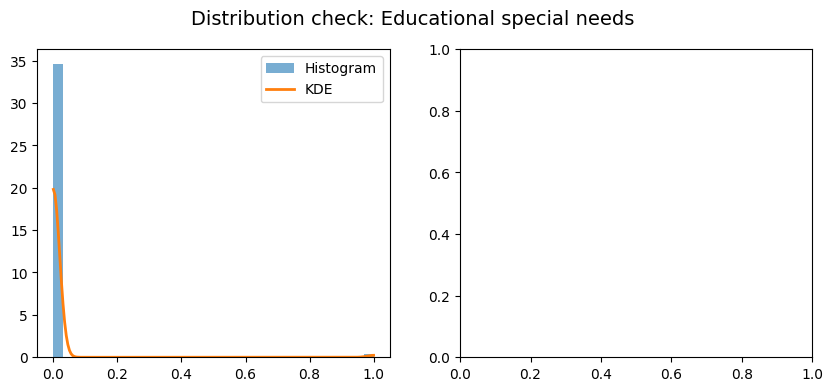

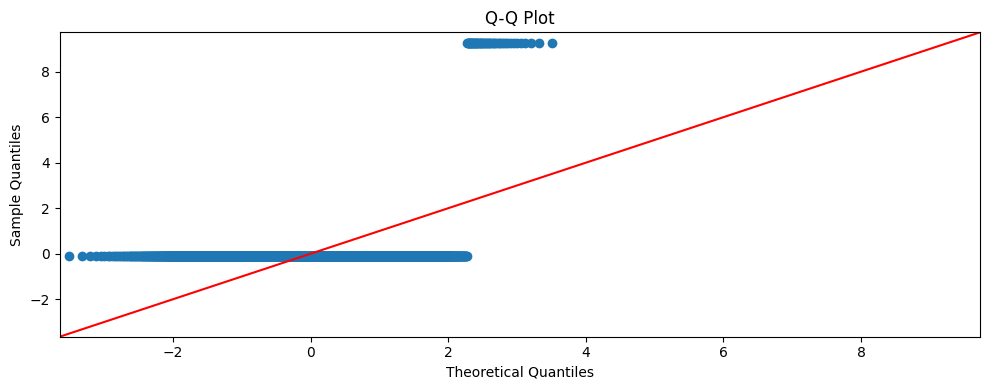

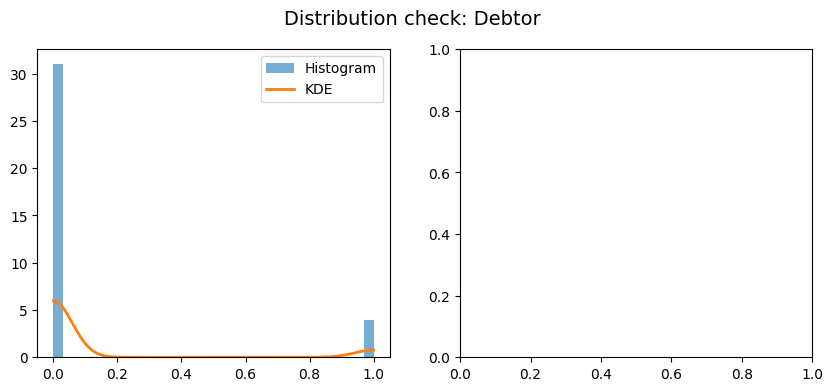

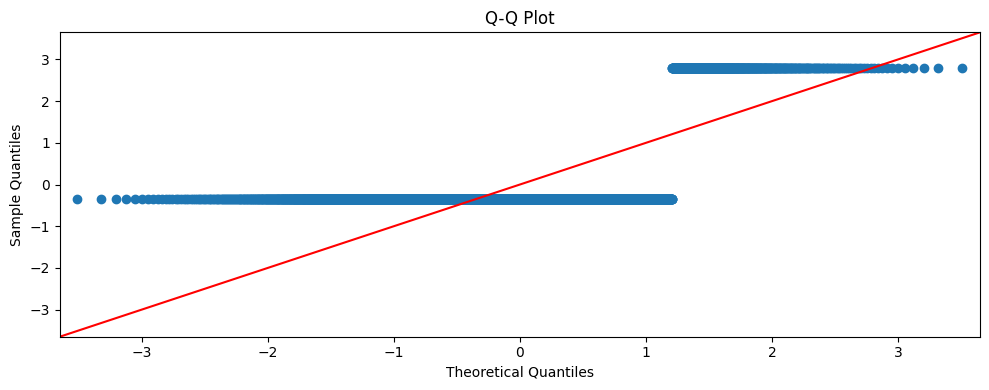

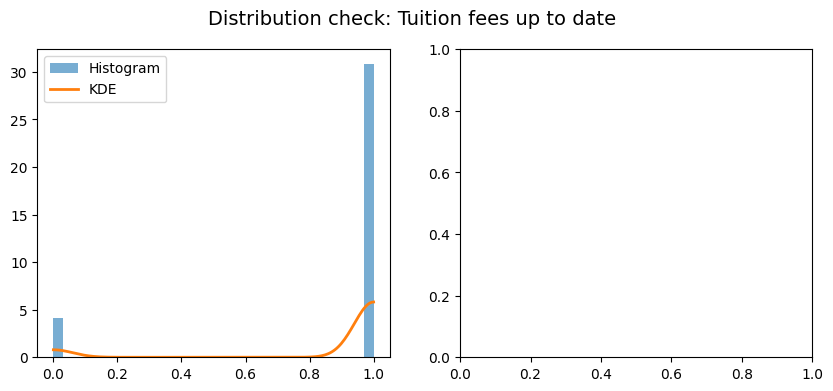

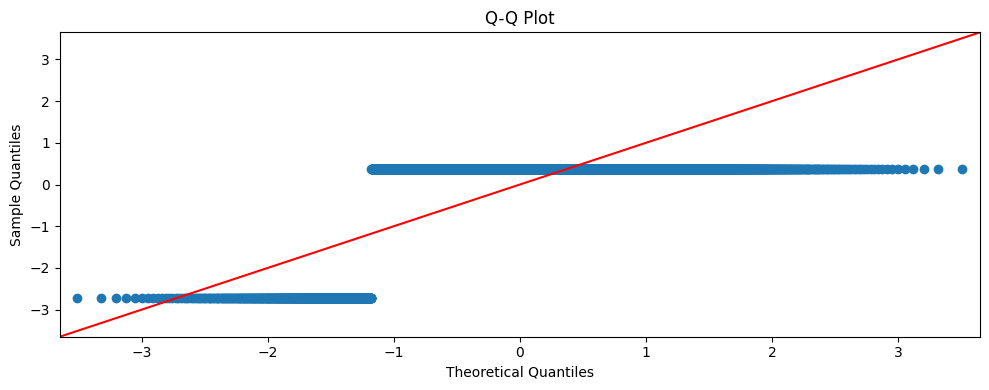

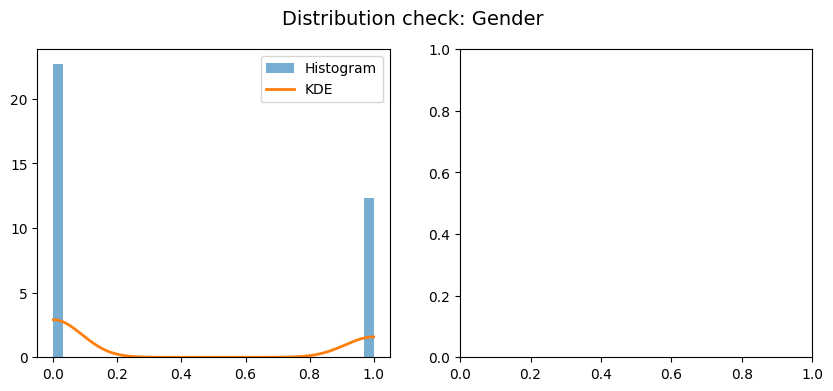

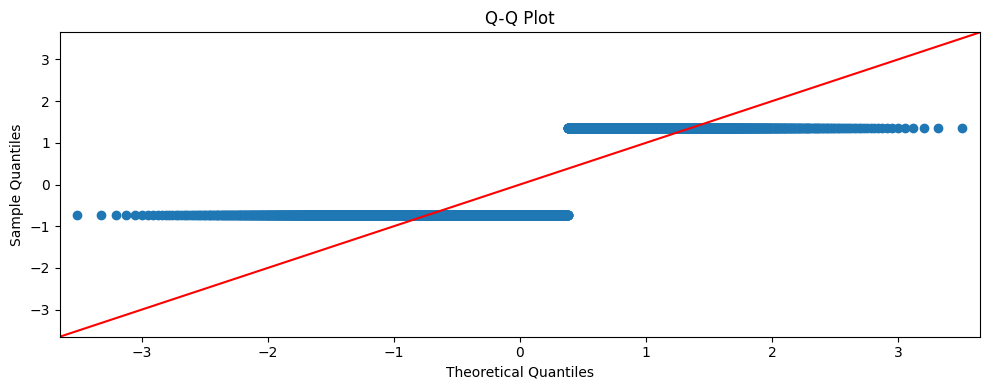

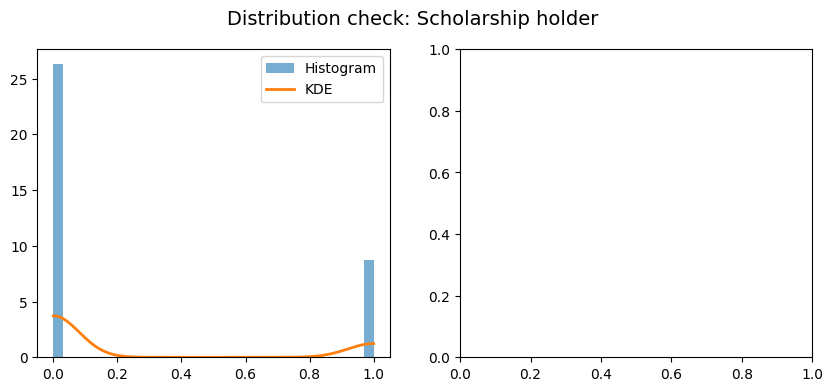

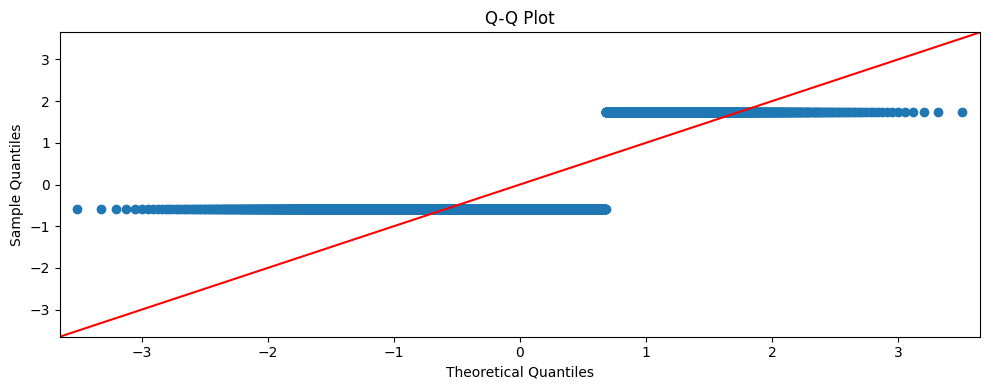

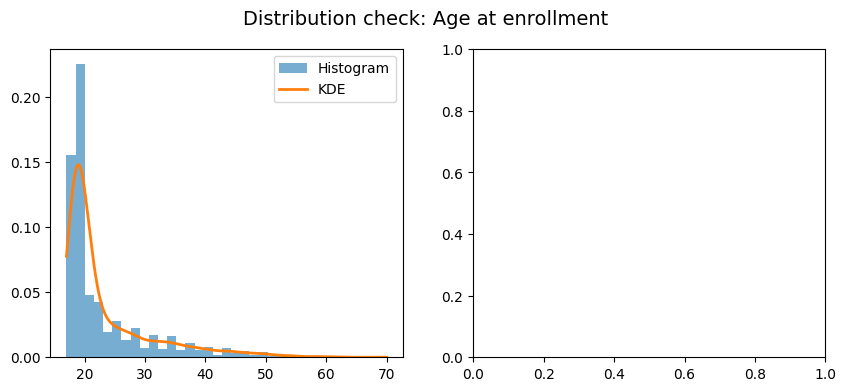

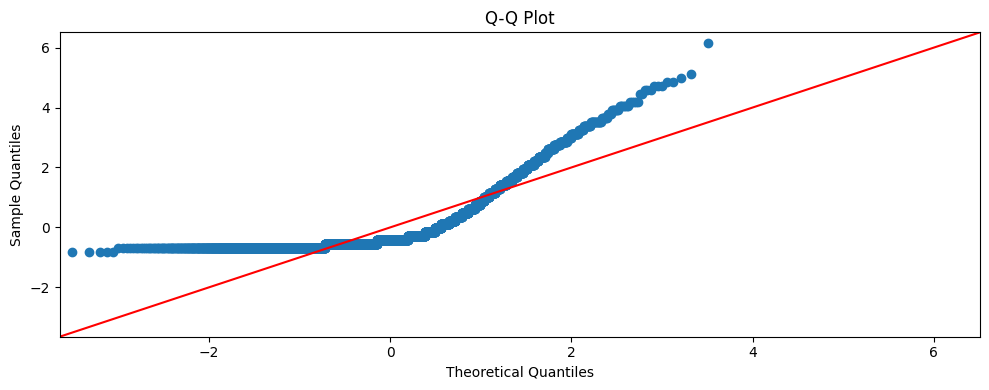

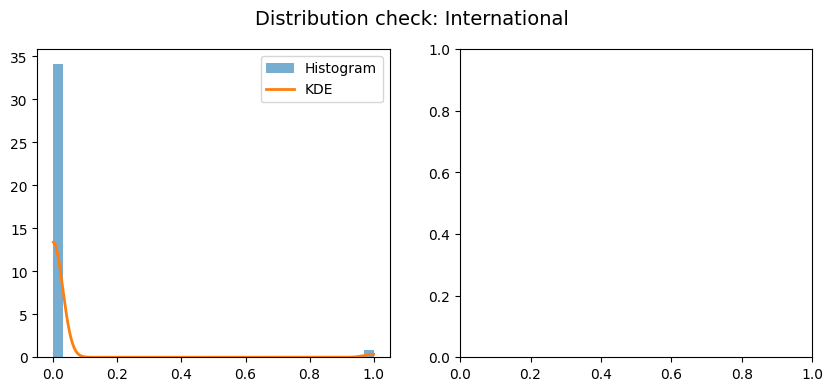

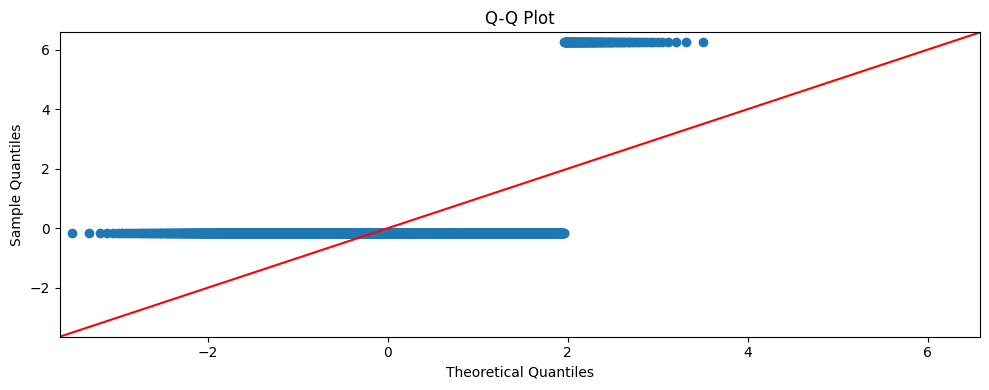

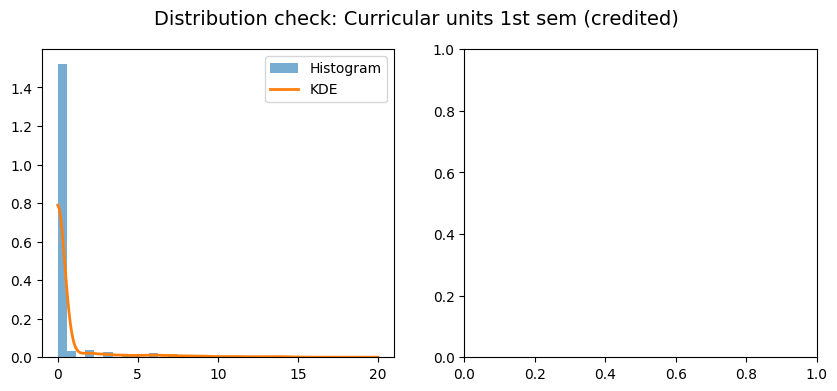

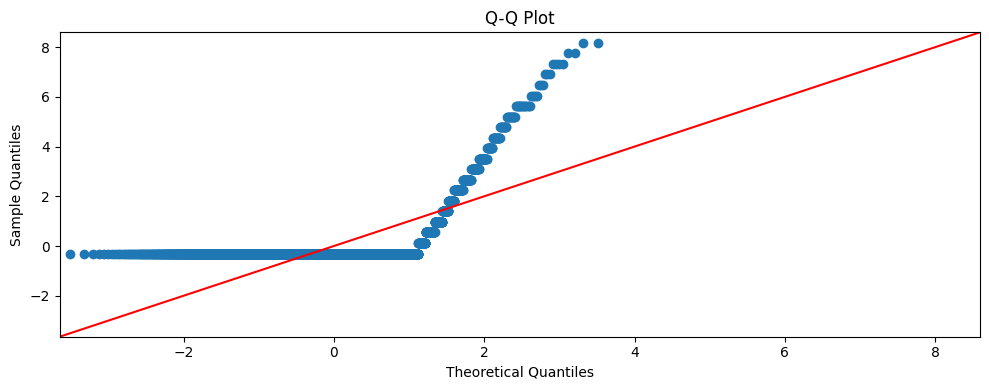

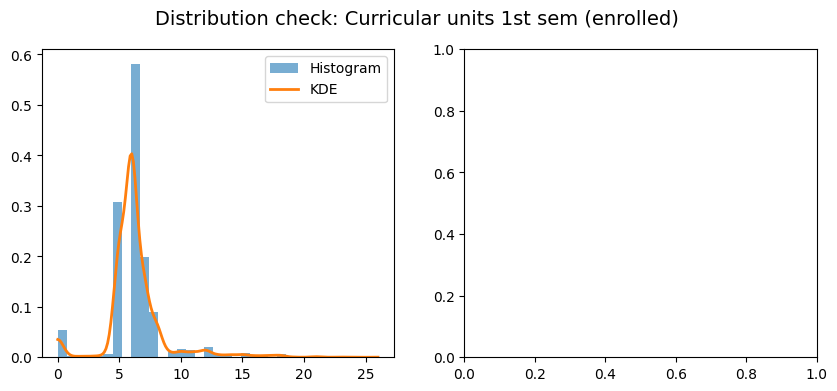

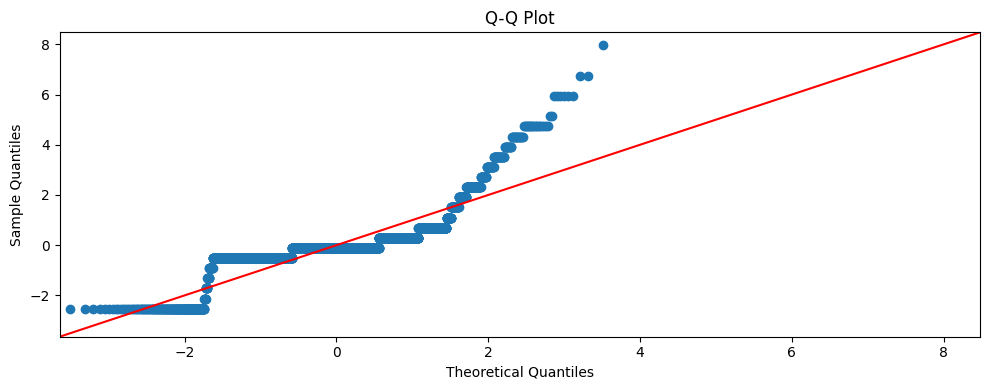

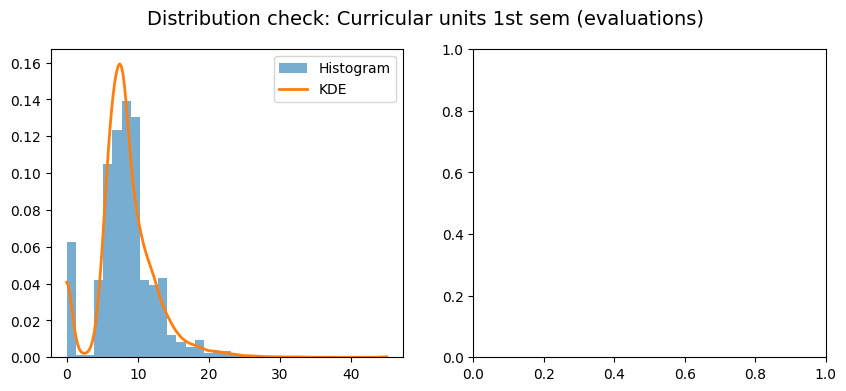

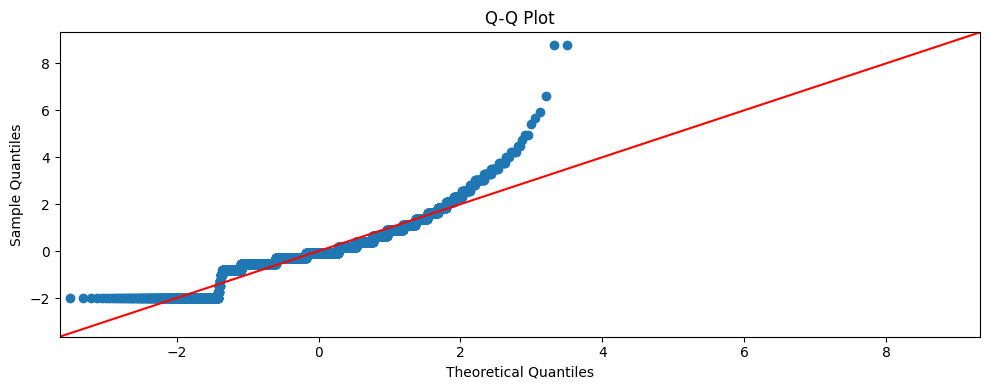

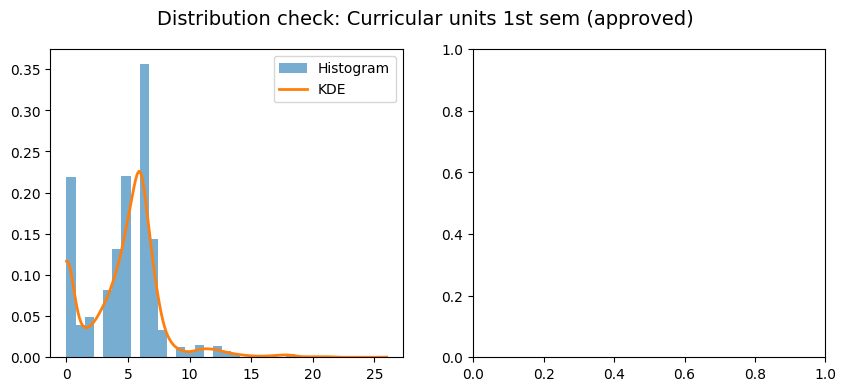

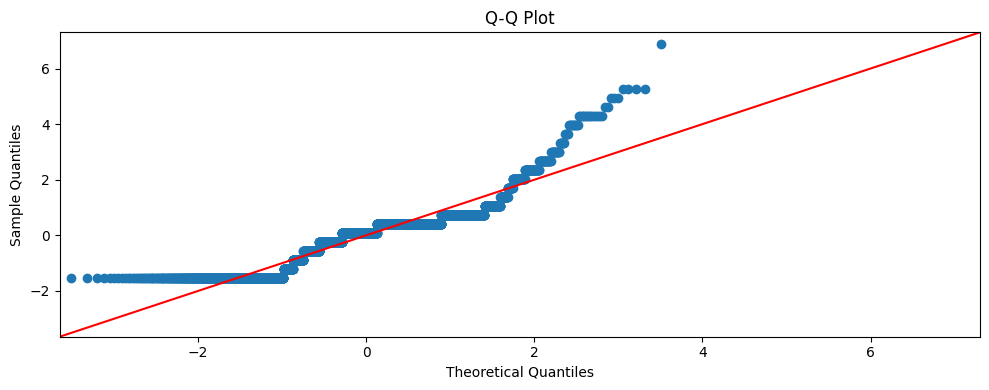

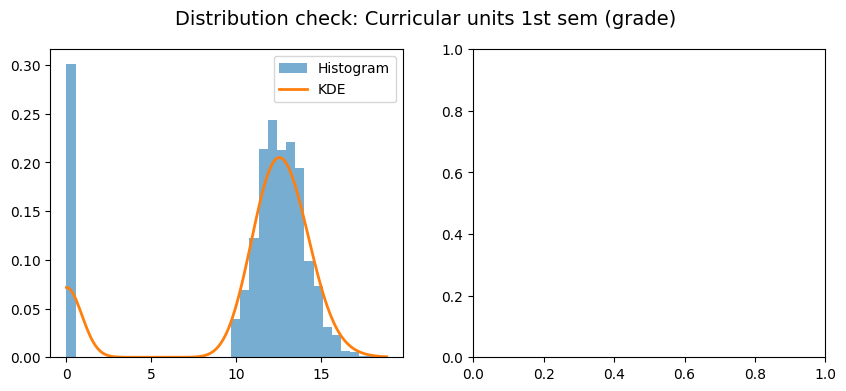

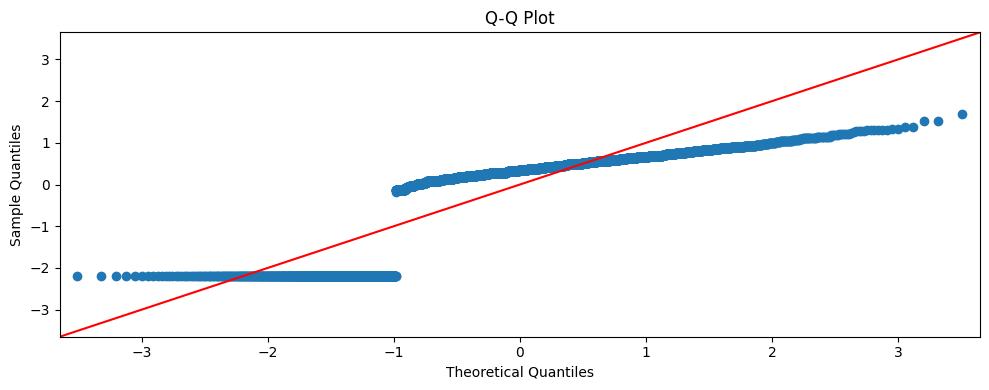

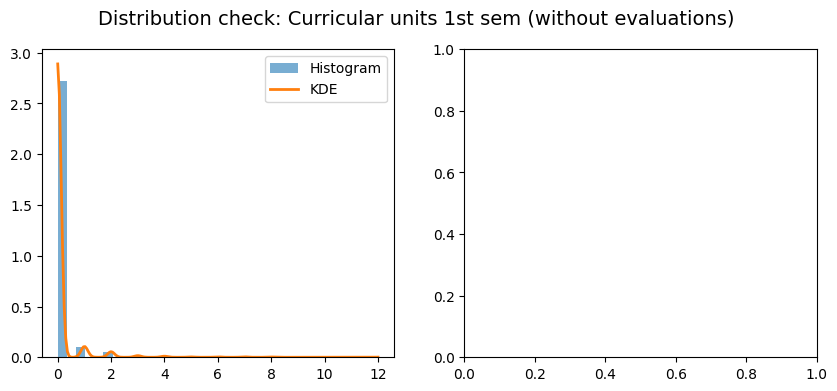

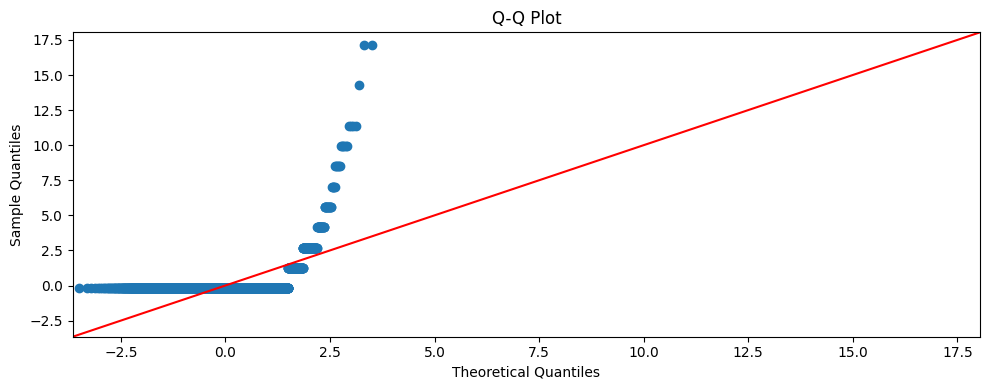

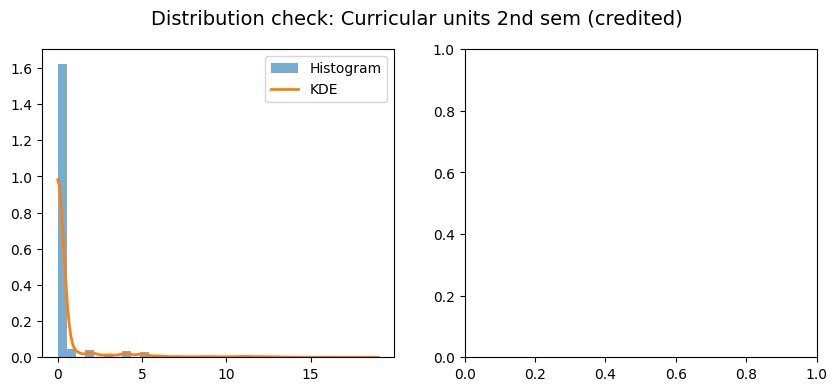

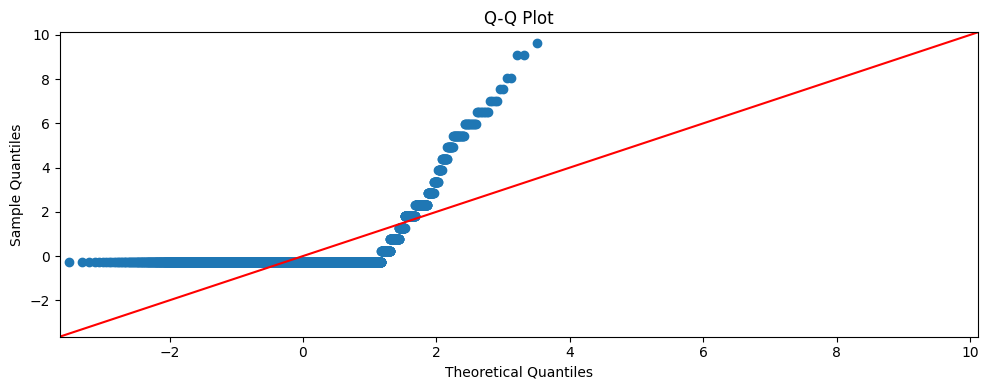

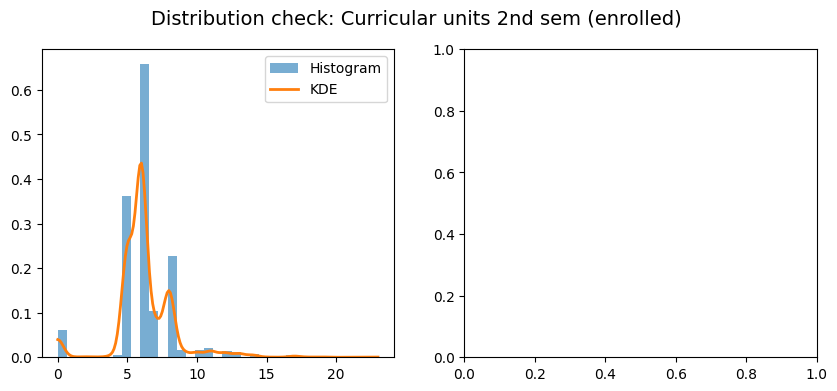

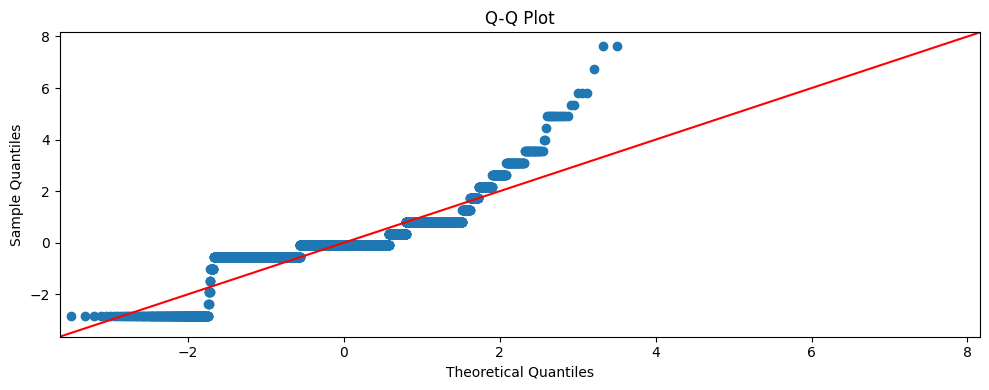

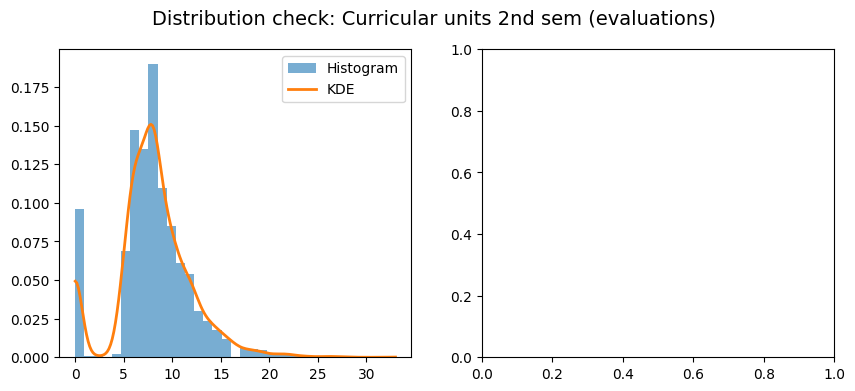

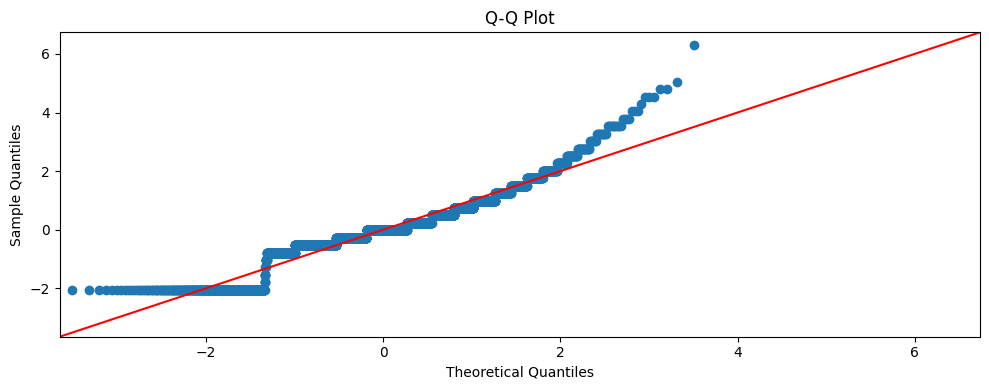

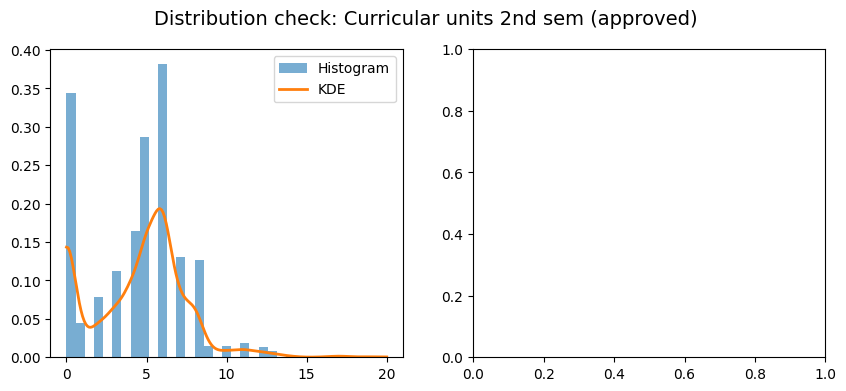

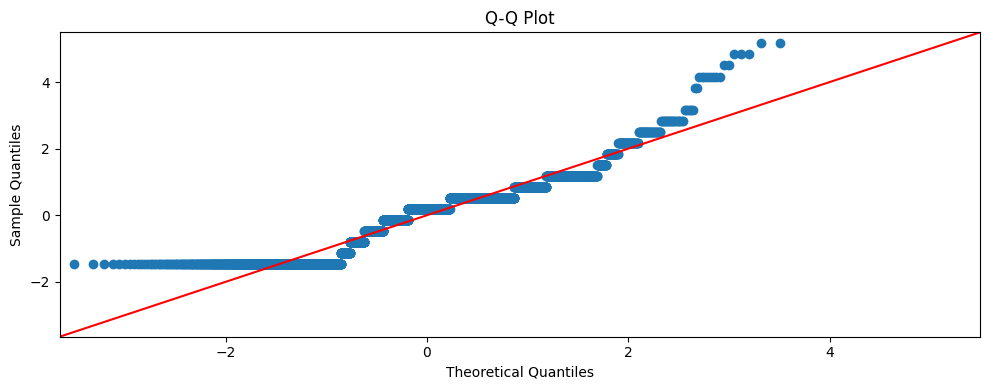

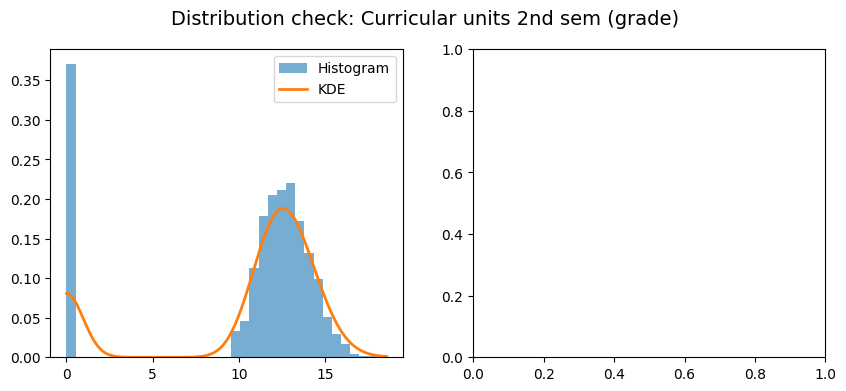

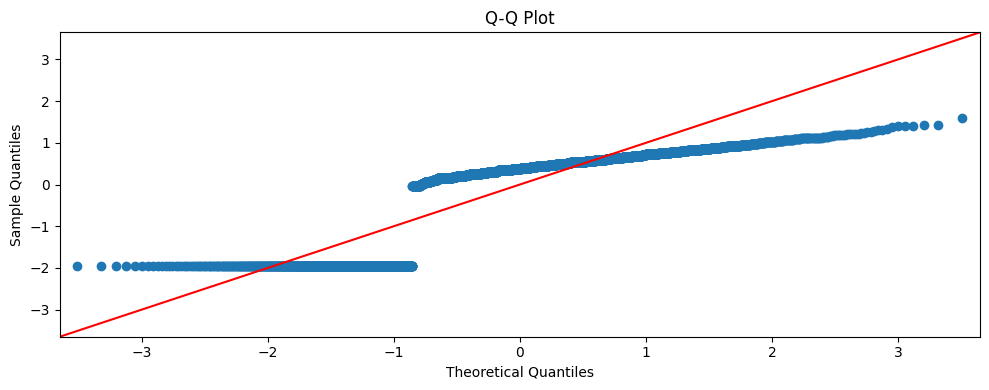

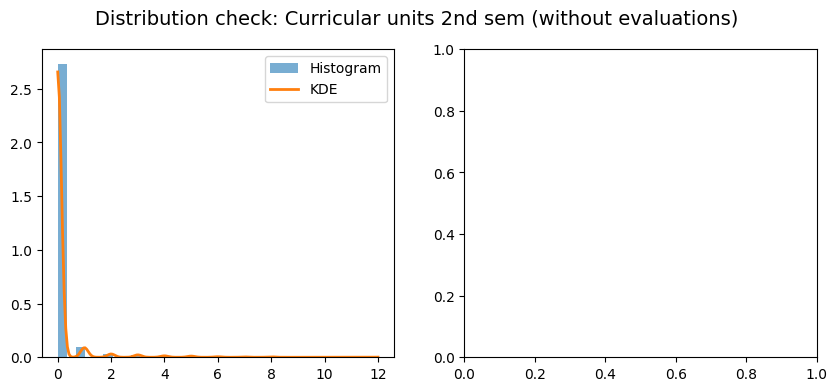

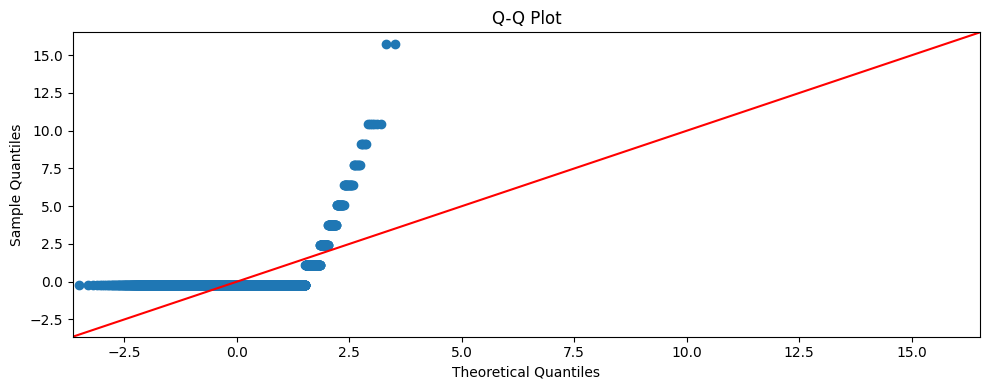

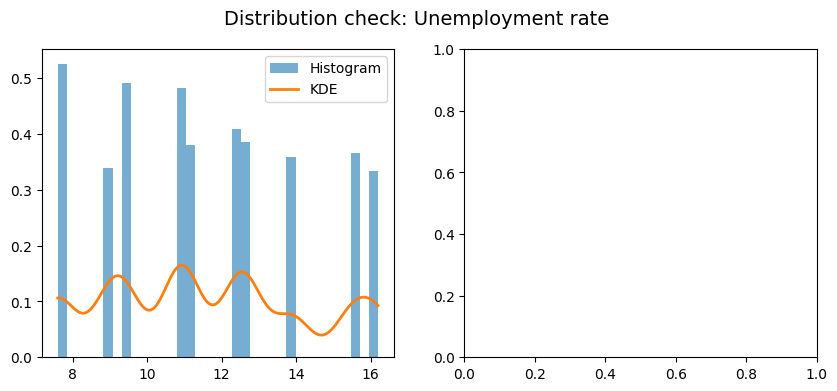

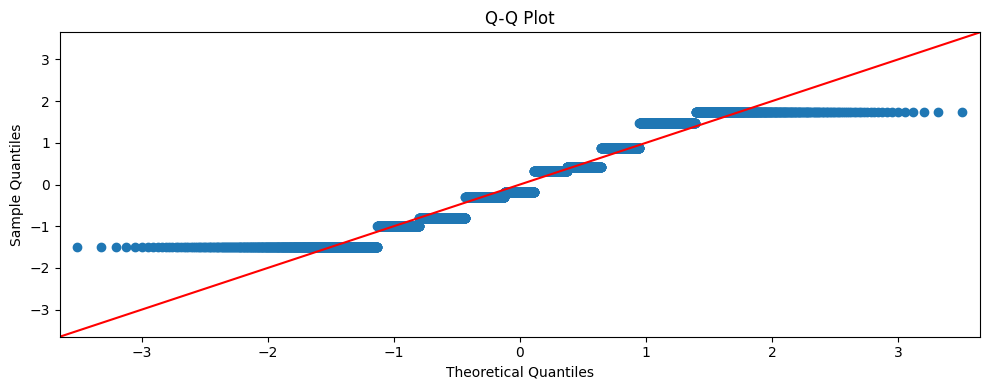

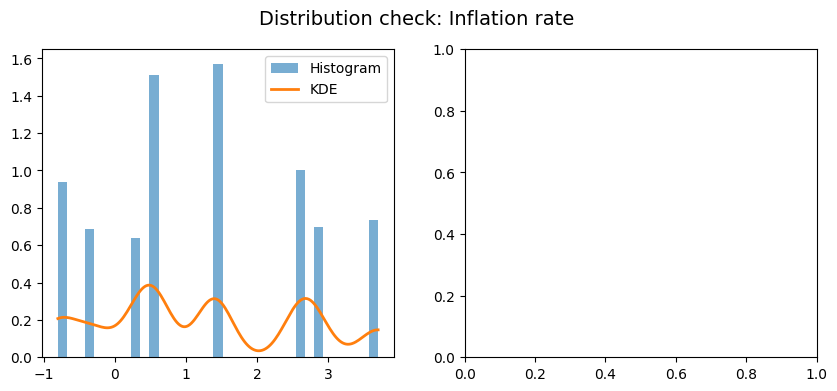

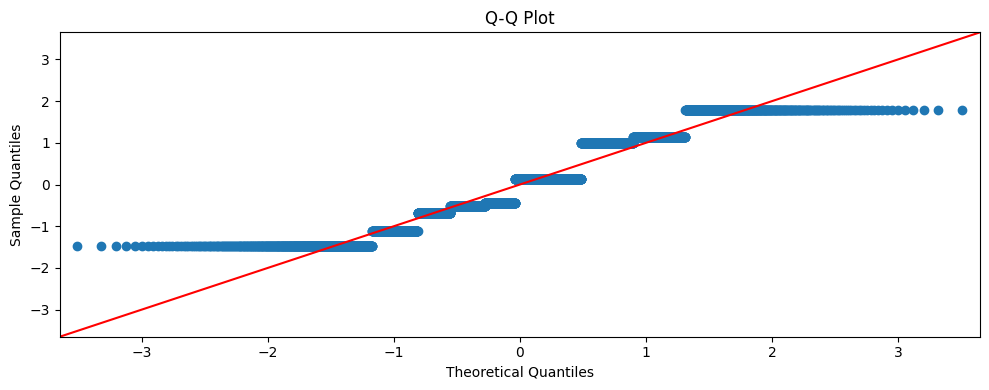

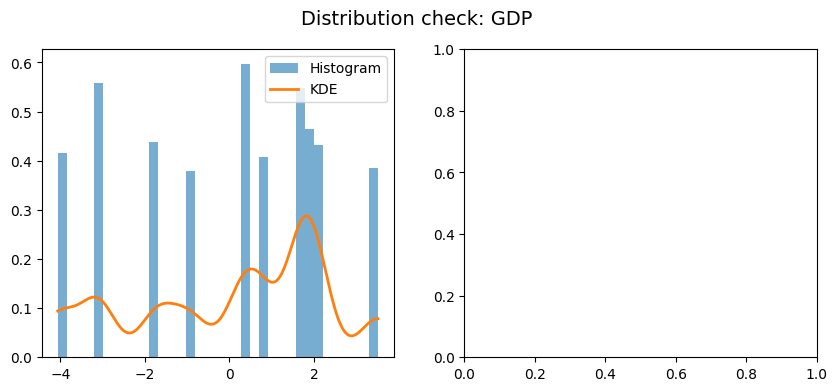

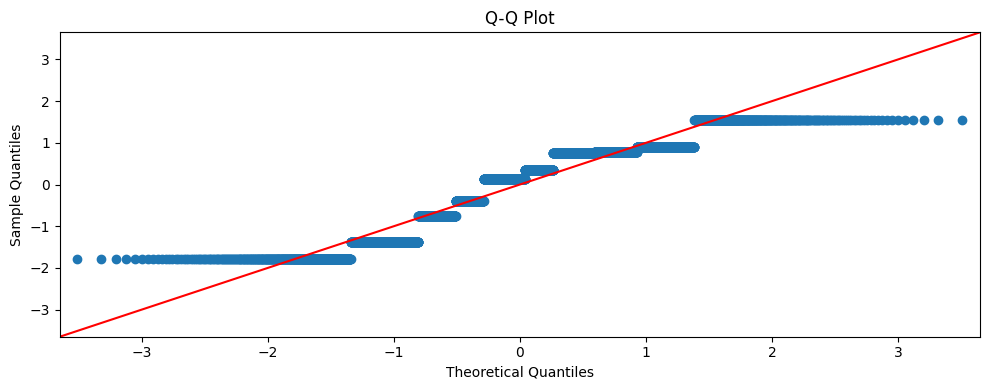


====== NORMALITY SUMMARY ======

                                            column     Shapiro_p  \
0                                   Marital status  1.113040e-83   
1                                 Application mode  6.337655e-55   
2                                Application order  1.378633e-71   
3                                           Course  1.368419e-34   
4                               evening attendance  1.514561e-82   
5                           Previous qualification  3.394416e-80   
6                                      Nacionality  2.066903e-89   
7                           Mother's qualification  1.057546e-57   
8                           Father's qualification  1.822293e-59   
9                              Mother's occupation  6.149917e-61   
10                             Father's occupation  4.571049e-70   
11                                       Displaced  8.063567e-71   
12                       Educational special needs  1.148946e-90   
13            

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# =======================
# 1) Load dataset
# =======================
df = pd.read_csv("student_data.csv", sep=";")   # veya student_data_2.csv
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Numeric columns:", list(numeric_cols))


# =======================
# 2) Normality test for each column
# =======================
results = []

for col in numeric_cols:
    arr = df[col].dropna().to_numpy(dtype=float)

    # ---- Tests ----
    # Shapiro küçük sample'larda daha iyi (limit 5000)
    if len(arr) <= 5000:
        shapiro_p = stats.shapiro(arr).pvalue
    else:
        shapiro_p = np.nan

    jb_stat, jb_p = stats.jarque_bera(arr)
    ad_stat = stats.anderson(arr, dist="norm").statistic

    # ---- Decision ----  
    normal = (jb_p > 0.05) and ( (shapiro_p > 0.05) if not np.isnan(shapiro_p) else True )

    results.append({
        "column": col,
        "Shapiro_p": shapiro_p,
        "JarqueBera_p": jb_p,
        "Anderson_stat": ad_stat,
        "Normal? (p>0.05)": "YES" if normal else "NO"
    })

    # ---- Visualization ----
    plt.figure(figsize=(10,4))
    plt.suptitle(f"Distribution check: {col}", fontsize=14)

    plt.subplot(1,2,1)
    plt.hist(arr, bins=35, density=True, alpha=0.6, label="Histogram")
    xs = np.linspace(arr.min(), arr.max(), 200)
    kde = stats.gaussian_kde(arr)
    plt.plot(xs, kde(xs), label="KDE", lw=2)
    plt.legend()

    plt.subplot(1,2,2)
    sm.qqplot(arr, line="45", fit=True)
    plt.title("Q-Q Plot")
    plt.tight_layout()
    plt.show()

# =======================
# 3) Summary table
# =======================
result_df = pd.DataFrame(results)
print("\n====== NORMALITY SUMMARY ======\n")
print(result_df)



=== student_data_2 ===
Numeric columns: ['Application mode', 'Course', 'Tuition fees up to date', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (passed)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (passed)']


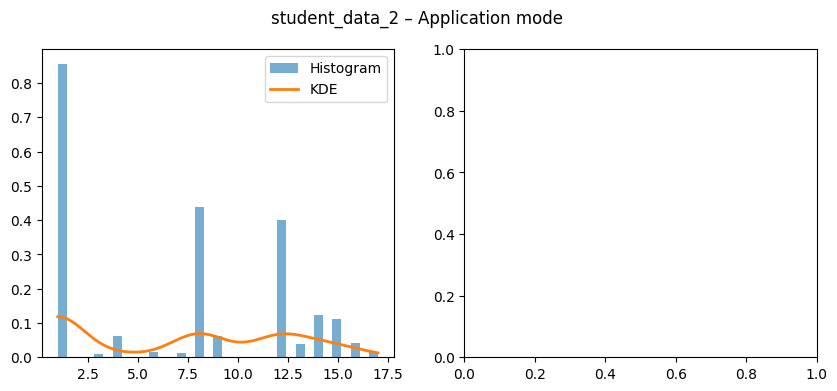

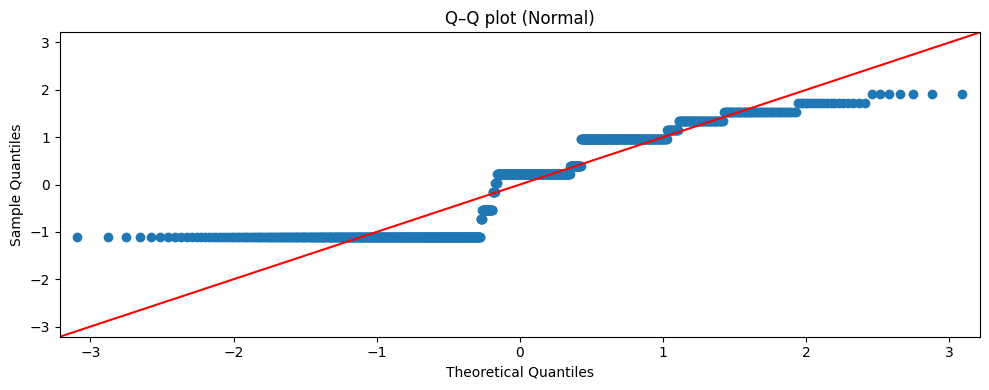

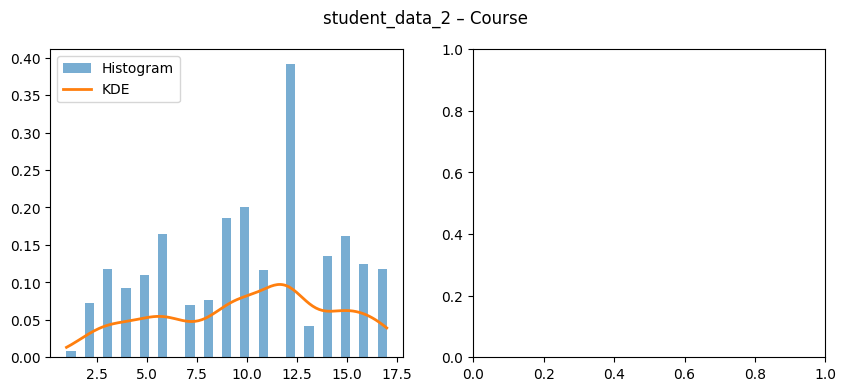

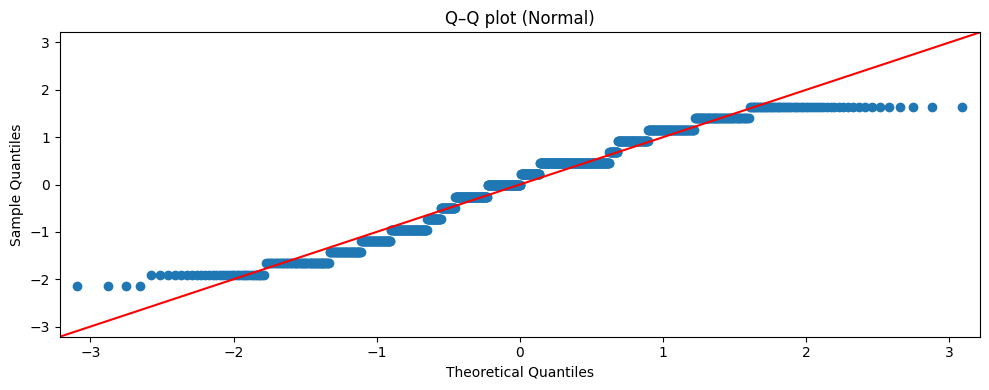

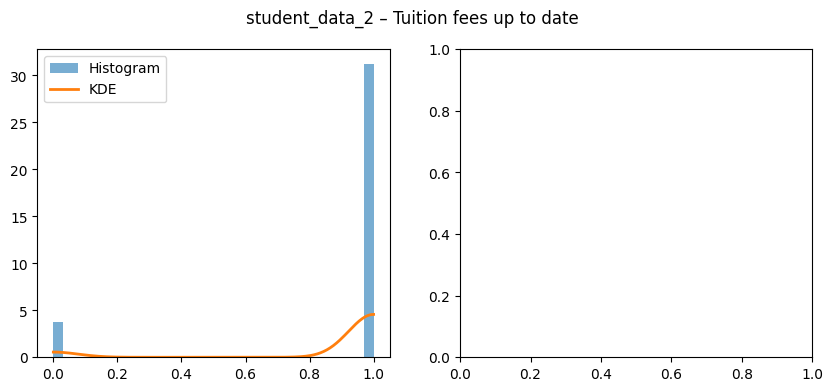

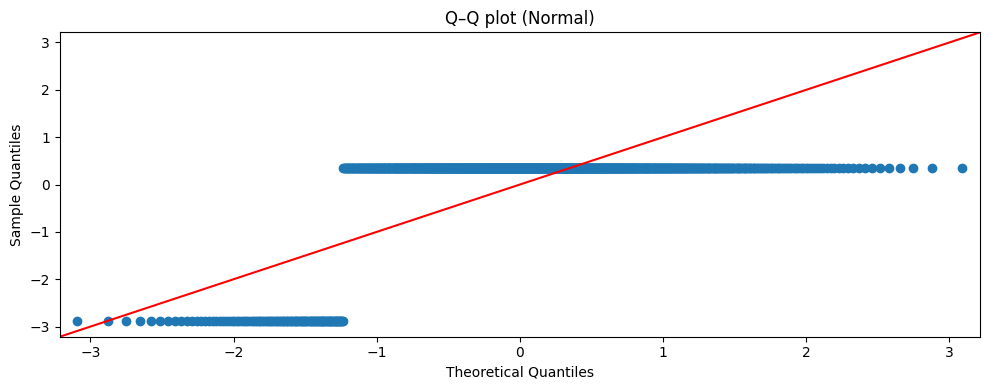

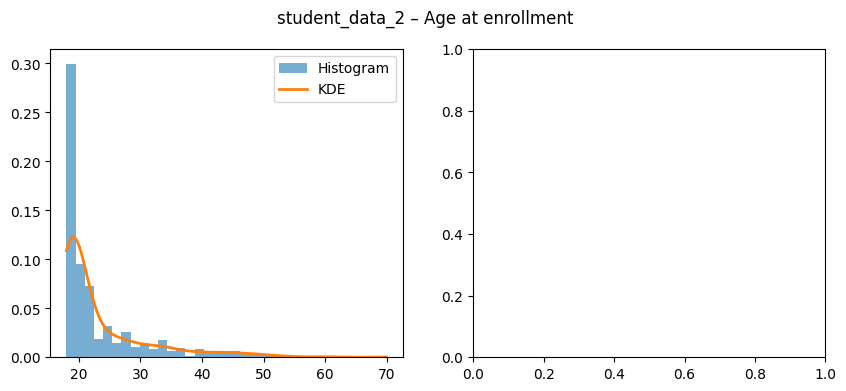

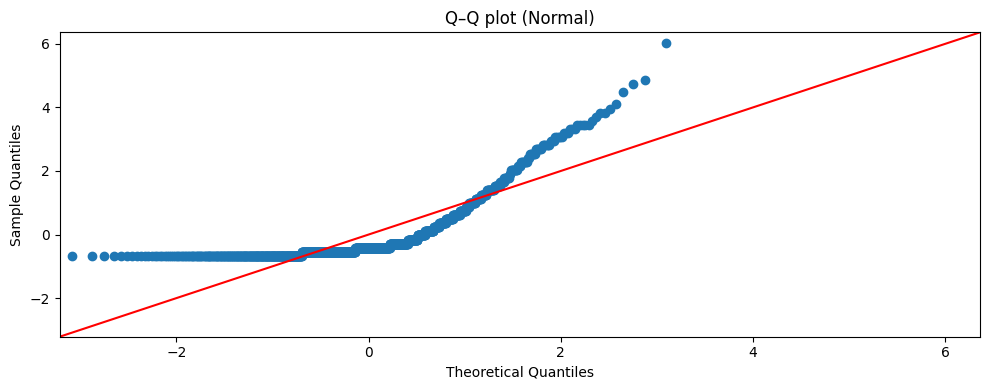

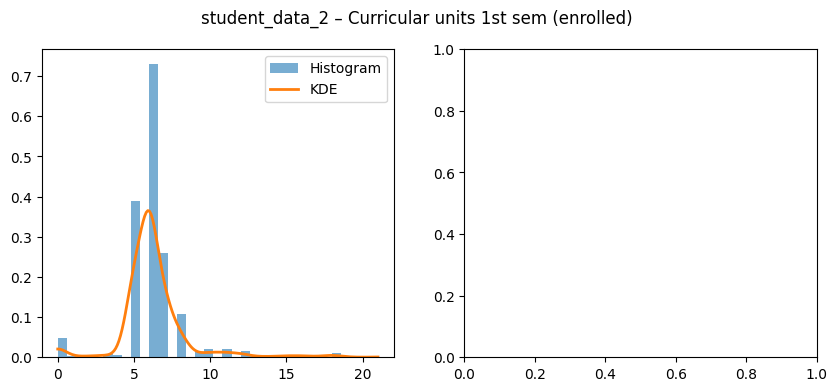

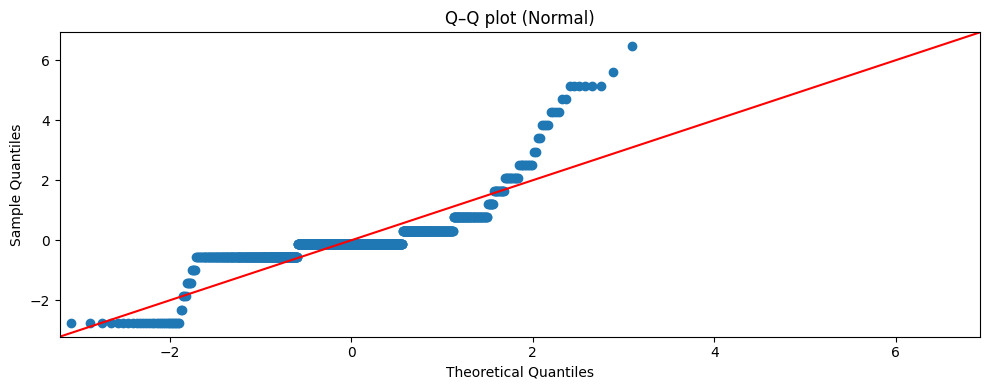

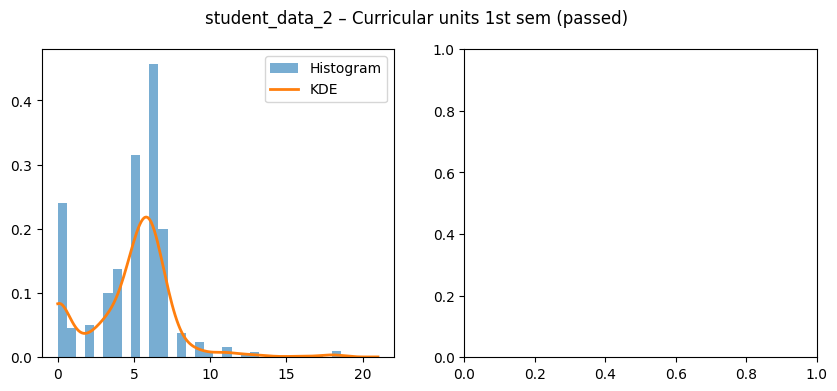

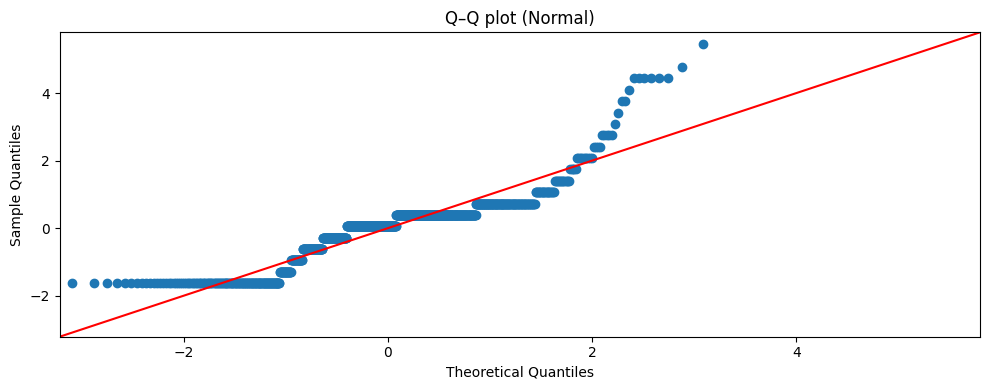

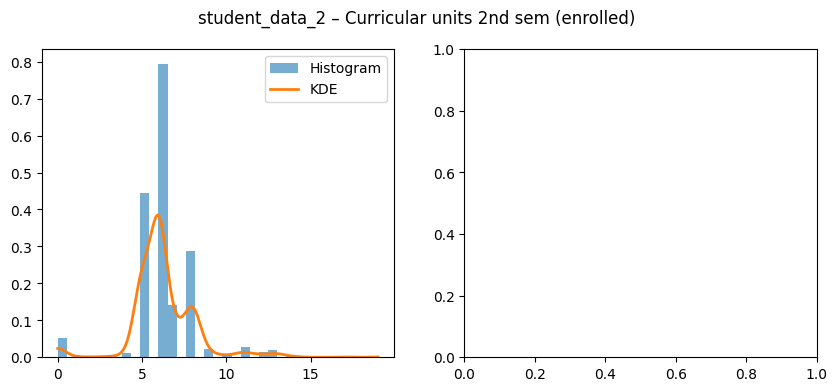

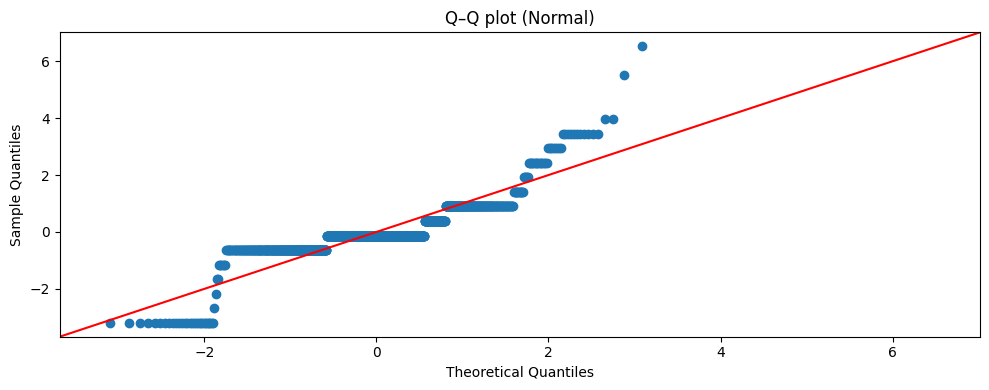

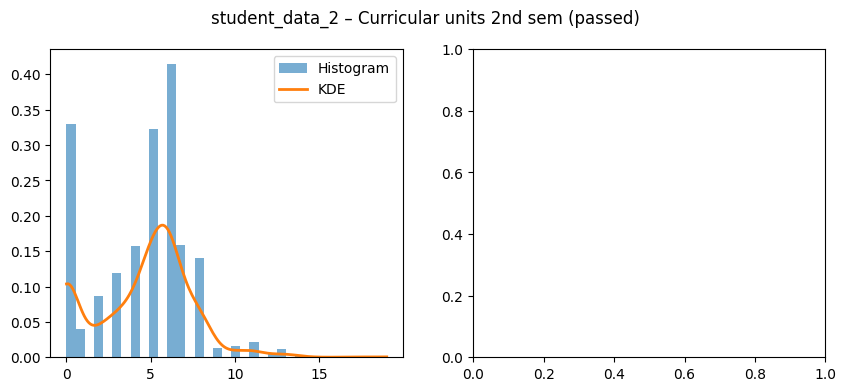

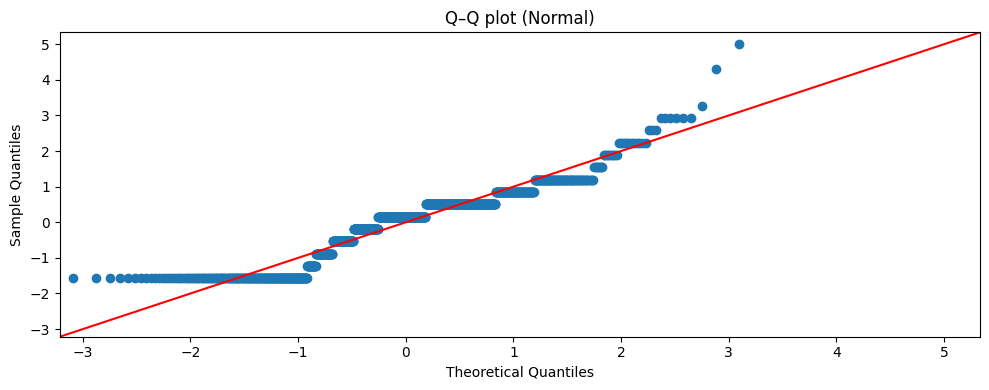


====== NORMALITY SUMMARY ======

                                column     Shapiro_p   JarqueBera_p  \
0                     Application mode  1.312934e-30   1.201006e-21   
1                               Course  1.520805e-16   1.959730e-10   
2              Tuition fees up to date  2.578266e-50   0.000000e+00   
3                    Age at enrollment  2.767021e-39   0.000000e+00   
4  Curricular units 1st sem (enrolled)  3.766137e-38   0.000000e+00   
5    Curricular units 1st sem (passed)  9.628522e-28  2.853635e-132   
6  Curricular units 2nd sem (enrolled)  1.533720e-33   0.000000e+00   
7    Curricular units 2nd sem (passed)  2.486124e-22   2.014912e-03   

   Anderson_stat Normal? (p>0.05)  
0      64.987556               NO  
1      12.200523               NO  
2     324.069905               NO  
3     111.244859               NO  
4      95.277306               NO  
5      37.206006               NO  
6      68.840152               NO  
7      26.998574               NO  


In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 4)

# =======================
# Function: normality check for one dataset
# =======================
def normality_check(csv_path, dataset_name, sep=";"):
    df = pd.read_csv(csv_path, sep=sep)
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    print(f"\n=== {dataset_name} ===")
    print("Numeric columns:", list(numeric_cols))

    results = []

    for col in numeric_cols:
        arr = df[col].dropna().to_numpy(dtype=float)

        # ---- Shapiro (only for <=5000 obs) ----
        if len(arr) <= 5000:
            shapiro_p = stats.shapiro(arr).pvalue
        else:
            shapiro_p = np.nan

        # ---- Jarque–Bera ----
        jb_stat, jb_p = stats.jarque_bera(arr)

        # ---- Anderson–Darling ----
        ad_res = stats.anderson(arr, dist="norm")
        ad_stat = ad_res.statistic

        normal = (jb_p > 0.05) and ( (shapiro_p > 0.05) if not np.isnan(shapiro_p) else True )

        results.append({
            "column": col,
            "Shapiro_p": shapiro_p,
            "JarqueBera_p": jb_p,
            "Anderson_stat": ad_stat,
            "Normal? (p>0.05)": "YES" if normal else "NO",
        })

        # ---- Visuals (hist + KDE + QQ) ----
        plt.figure()
        plt.suptitle(f"{dataset_name} – {col}")

        # Histogram + KDE
        plt.subplot(1, 2, 1)
        plt.hist(arr, bins=35, density=True, alpha=0.6, label="Histogram")
        xs = np.linspace(arr.min(), arr.max(), 200)
        kde = stats.gaussian_kde(arr)
        plt.plot(xs, kde(xs), lw=2, label="KDE")
        plt.legend()

        # Q–Q plot
        plt.subplot(1, 2, 2)
        sm.qqplot(arr, line="45", fit=True)
        plt.title("Q–Q plot (Normal)")
        plt.tight_layout()
        plt.show()

    result_df = pd.DataFrame(results)
    print("\n====== NORMALITY SUMMARY ======\n")
    print(result_df)
    return df, result_df


# =======================
# Run for student_data_2.csv
# =======================
df2, normality2 = normality_check("student_data_2.csv", "student_data_2")
